#Librerías

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

In [2]:
drive.mount('/content/drive')
df = pd.concat(
    pd.read_excel("/content/drive/MyDrive/Colab Notebooks/online_retail_II.xlsx",
                 sheet_name=['Year 2009-2010', 'Year 2010-2011']),
    ignore_index=True
)

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [4]:
df.sample(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30324,491966,22246,"GARLAND, MAGIC GARDEN 1.8M",1,2009-12-14 17:16:00,4.30,NaN,United Kingdom
737227,555397,22304,COFFEE MUG BLUE PAISLEY DESIGN,1,2011-06-02 17:26:00,4.96,NaN,United Kingdom
603915,542881,22699,ROSES REGENCY TEACUP AND SAUCER,2,2011-02-01 12:54:00,2.95,14587.0,United Kingdom
452541,532384,22162,HEART GARLAND RUSTIC PADDED,8,2010-11-11 18:34:00,2.95,12748.0,United Kingdom
43396,493079,48188,DOOR MAT WELCOME PUPPIES,1,2009-12-22 09:52:00,13.87,NaN,United Kingdom
932946,571883,22161,HEART DECORATION RUSTIC HANGING,14,2011-10-19 13:58:00,0.19,14704.0,United Kingdom
1000175,576846,22448,PIN CUSHION BABUSHKA RED,6,2011-11-16 15:35:00,3.35,13500.0,United Kingdom
920989,571035,47591D,PINK FAIRY CAKE CHILDRENS APRON,8,2011-10-13 12:50:00,1.95,12446.0,RSA
901454,569491,22725,ALARM CLOCK BAKELIKE CHOCOLATE,2,2011-10-04 13:25:00,3.75,14056.0,United Kingdom
890168,568670,48111,DOORMAT 3 SMILEY CATS,2,2011-09-28 13:07:00,8.25,14978.0,United Kingdom


In [5]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


Observaciones:
1.   Description y Custormer ID tienen valores vacíos.
2.   Quantity y Price, tiene valores negativos.



#Limpieza

In [7]:
def eliminar_duplicados_personalizados(df, columnas_clave=None, considerar_fecha=True, verbose=True):
    """
    Identifica y elimina duplicados
    """
    columnas_clave = ['Invoice', 'StockCode', 'Quantity','Price','InvoiceDate']
    duplicados = df.duplicated(subset=columnas_clave, keep='first').sum()
    df_limpio = df.drop_duplicates(subset=columnas_clave, keep='first')
    if verbose:
        print("\n=== Análisis de duplicados ===")
        print(f"Registros originales: {len(df)}")
        print(f"Registros duplicados: {duplicados}")
        print(f"Registros únicos: {len(df_limpio)}")
        print(f"Porcentaje de duplicados: {duplicados/len(df)*100:.2f}%")

    return df_limpio, duplicados

In [8]:
df_limpio, num_duplicados = eliminar_duplicados_personalizados(df)


=== Análisis de duplicados ===
Registros originales: 1067371
Registros duplicados: 34337
Registros únicos: 1033034
Porcentaje de duplicados: 3.22%


In [9]:
negativos = df_limpio[df_limpio['Price'] < 0]
print(f"\nRegistros con precios negativos ({len(negativos)} encontrados):")
print(negativos[['Invoice', 'StockCode', 'Description', 'Price']])


Registros con precios negativos (5 encontrados):
        Invoice StockCode      Description     Price
179403  A506401         B  Adjust bad debt -53594.36
276274  A516228         B  Adjust bad debt -44031.79
403472  A528059         B  Adjust bad debt -38925.87
825444  A563186         B  Adjust bad debt -11062.06
825445  A563187         B  Adjust bad debt -11062.06


In [10]:
def filtrar_irrelevantes(df):

    df_filtrado = df.copy()

    # Eliminar cancelaciones (facturas que empiezan con 'C')
    cancelaciones = df_filtrado[df_filtrado['Invoice'].astype(str).str.startswith('C')].index
    df_filtrado = df_filtrado.drop(cancelaciones)

    #Eliminar precios negativos
    precios_negativos = df_filtrado[df_filtrado['Price'] < 0]
    df_filtrado = df_filtrado.drop(precios_negativos.index)

    #Eliminar cantidades negativas
    precios_negativos = df_filtrado[df_filtrado['Quantity'] < 0]
    df_filtrado = df_filtrado.drop(precios_negativos.index)

    #LLena el campo 'Description' y 'Customer ID'
    df_filtrado['Description'] = df_filtrado['Description'].fillna('Unspecified')
    df_filtrado['Customer ID'] = df_filtrado['Customer ID'].fillna(0)

    print(f"- Cancelaciones: {df_filtrado['Invoice'].astype(str).str.startswith('C').sum()}")
    print(f"- Precios negativos: {len(precios_negativos)}")
    print(f"- Cantidades negativas: {len(precios_negativos)}")
    print(f"Total final: {len(df_filtrado)} registros")
    return df_filtrado

In [11]:
df_limpio = filtrar_irrelevantes(df_limpio)

- Cancelaciones: 0
- Precios negativos: 3393
- Cantidades negativas: 3393
Total final: 1010532 registros


In [12]:
#Formatos
df_limpio['Invoice'] = df_limpio['Invoice'].astype('string')
df_limpio['StockCode'] = df_limpio['StockCode'].astype('string')
df_limpio['Country'] = df_limpio['Country'].astype('string')
df_limpio['Description'] = df_limpio['Description'].astype('string')
df_limpio['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#EDA

In [13]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010532 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1010532 non-null  string        
 1   StockCode    1010532 non-null  string        
 2   Description  1010532 non-null  string        
 3   Quantity     1010532 non-null  int64         
 4   InvoiceDate  1010532 non-null  datetime64[ns]
 5   Price        1010532 non-null  float64       
 6   Customer ID  1010532 non-null  float64       
 7   Country      1010532 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 69.4 MB


In [14]:
df_limpio.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.010532e+06,1010532,1.010532e+06,1.010532e+06
mean,1.133621e+01,2011-01-04 07:06:20.666717440,4.063686e+00,1.181758e+04
min,1.000000e+00,2009-12-01 07:45:00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2010-07-06 09:51:00,1.250000e+00,1.252000e+04
50%,4.000000e+00,2010-12-09 14:27:00,2.100000e+00,1.450800e+04
75%,1.200000e+01,2011-07-28 10:33:00,4.130000e+00,1.636500e+04
max,8.099500e+04,2011-12-09 12:50:00,2.511109e+04,1.828700e+04
std,1.314653e+02,NaN,5.036549e+01,6.603893e+03


In [15]:
def analizar_distribuciones(df):
    """
    Analiza y visualiza la distribución de variables clave, mostrando dos gráficos por fila.
    """
    # Crear características temporales
    df['year'] = df['InvoiceDate'].dt.year
    df['month'] = df['InvoiceDate'].dt.month
    df['day'] = df['InvoiceDate'].dt.day
    df['day_of_week'] = df['InvoiceDate'].dt.dayofweek  # 0=Lunes, 6=Domingo
    df['hour'] = df['InvoiceDate'].dt.hour
    df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
    df['Weekday'] = df['InvoiceDate'].dt.day_name()

    # Configuración de estilo
    plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")

    # Crear figura con 4 filas y 2 columnas (para 8 gráficos)
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))
    fig.suptitle('Análisis Completo de Distribuciones y Patrones Temporales',
                 fontsize=16, y=1.02)
    axes = axes.flatten()

    # Gráfico 1: Distribución de Quantity
    sns.histplot(df['Quantity'].clip(lower=-50, upper=50), bins=50,
                 kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title('Distribución de Cantidades\n(Recortada entre -50 y 50)')

    # Gráfico 2: Distribución de Price
    sns.histplot(df['Price'].clip(upper=50), bins=50,
                 kde=True, color='salmon', ax=axes[1])
    axes[1].set_title('Distribución de Precios\n(Recortada en 50)')

    # Gráfico 3: Ventas por mes
    ventas_mensuales = df.groupby(df['YearMonth'].dt.to_timestamp(how='end'))['Quantity'].sum()
    ventas_mensuales.plot(kind='line', marker='o', color='teal', linewidth=2, ax=axes[2])
    axes[2].set_title('Tendencia de Ventas Mensuales (Dic 2009 - Dic 2011)')
    fechas_completas = pd.date_range(start='2009-12-31', end='2011-12-31', freq='M')
    axes[2].set_xticks(fechas_completas)
    axes[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
    axes[2].set_xlim([fechas_completas[0] - pd.Timedelta(days=15),
                     fechas_completas[-1] + pd.Timedelta(days=15)])
    plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right')

    # Gráfico 4: Ventas por día de la semana
    ventas_diarias = df.groupby(['day_of_week', 'Weekday'])['Quantity'].sum().reset_index()
    ventas_diarias = ventas_diarias.sort_values('day_of_week')
    sns.barplot(x='Weekday', y='Quantity', data=ventas_diarias,
                palette='viridis', ax=axes[3])
    axes[3].set_title('Ventas por Día de la Semana')
    axes[3].tick_params(axis='x', rotation=45)

    # Gráfico 5: Ventas por hora del día
    ventas_horarias = df.groupby('hour')['Quantity'].sum()
    sns.barplot(x=ventas_horarias.index, y=ventas_horarias.values,
                palette='rocket', ax=axes[4])
    axes[4].set_title('Ventas por Hora del Día')

    # Gráfico 6: Boxplot de precios por mes
    sns.boxplot(x='month', y='Price', data=df[df['Price'] <= 50],
                palette='pastel', ax=axes[5])
    axes[5].set_title('Distribución de Precios por Mes')

    # Gráfico 7: Heatmap de ventas
    heatmap_data = df.groupby(['day_of_week', 'hour'])['Quantity'].sum().unstack()
    sns.heatmap(heatmap_data, cmap='YlGnBu', ax=axes[6])
    axes[6].set_title('Heatmap de Ventas: Hora vs Día')

    # Gráfico 8: Distribución de ventas por año
    ventas_anuales = df.groupby('year')['Quantity'].sum()
    ventas_anuales.plot(kind='pie', autopct='%1.1f%%',
                        colors=['gold', 'lightcoral', 'lightskyblue'],
                        ax=axes[7])
    axes[7].set_title('Distribución de Ventas por Año')
    axes[7].set_ylabel('')

    # Ajustes finales
    for ax in axes:
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

    # Retorno de datos
    return {
        'ventas_mensuales': ventas_mensuales,
        'ventas_diarias': ventas_diarias,
        'ventas_horarias': ventas_horarias,
        'heatmap_data': heatmap_data
    }

<ipython-input-15-5e3fa0c254ff>:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_completas = pd.date_range(start='2009-12-31', end='2011-12-31', freq='M')
<ipython-input-15-5e3fa0c254ff>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Quantity', data=ventas_diarias,
<ipython-input-15-5e3fa0c254ff>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_horarias.index, y=ventas_horarias.values,
<ipython-input-15-5e3fa0c254ff>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

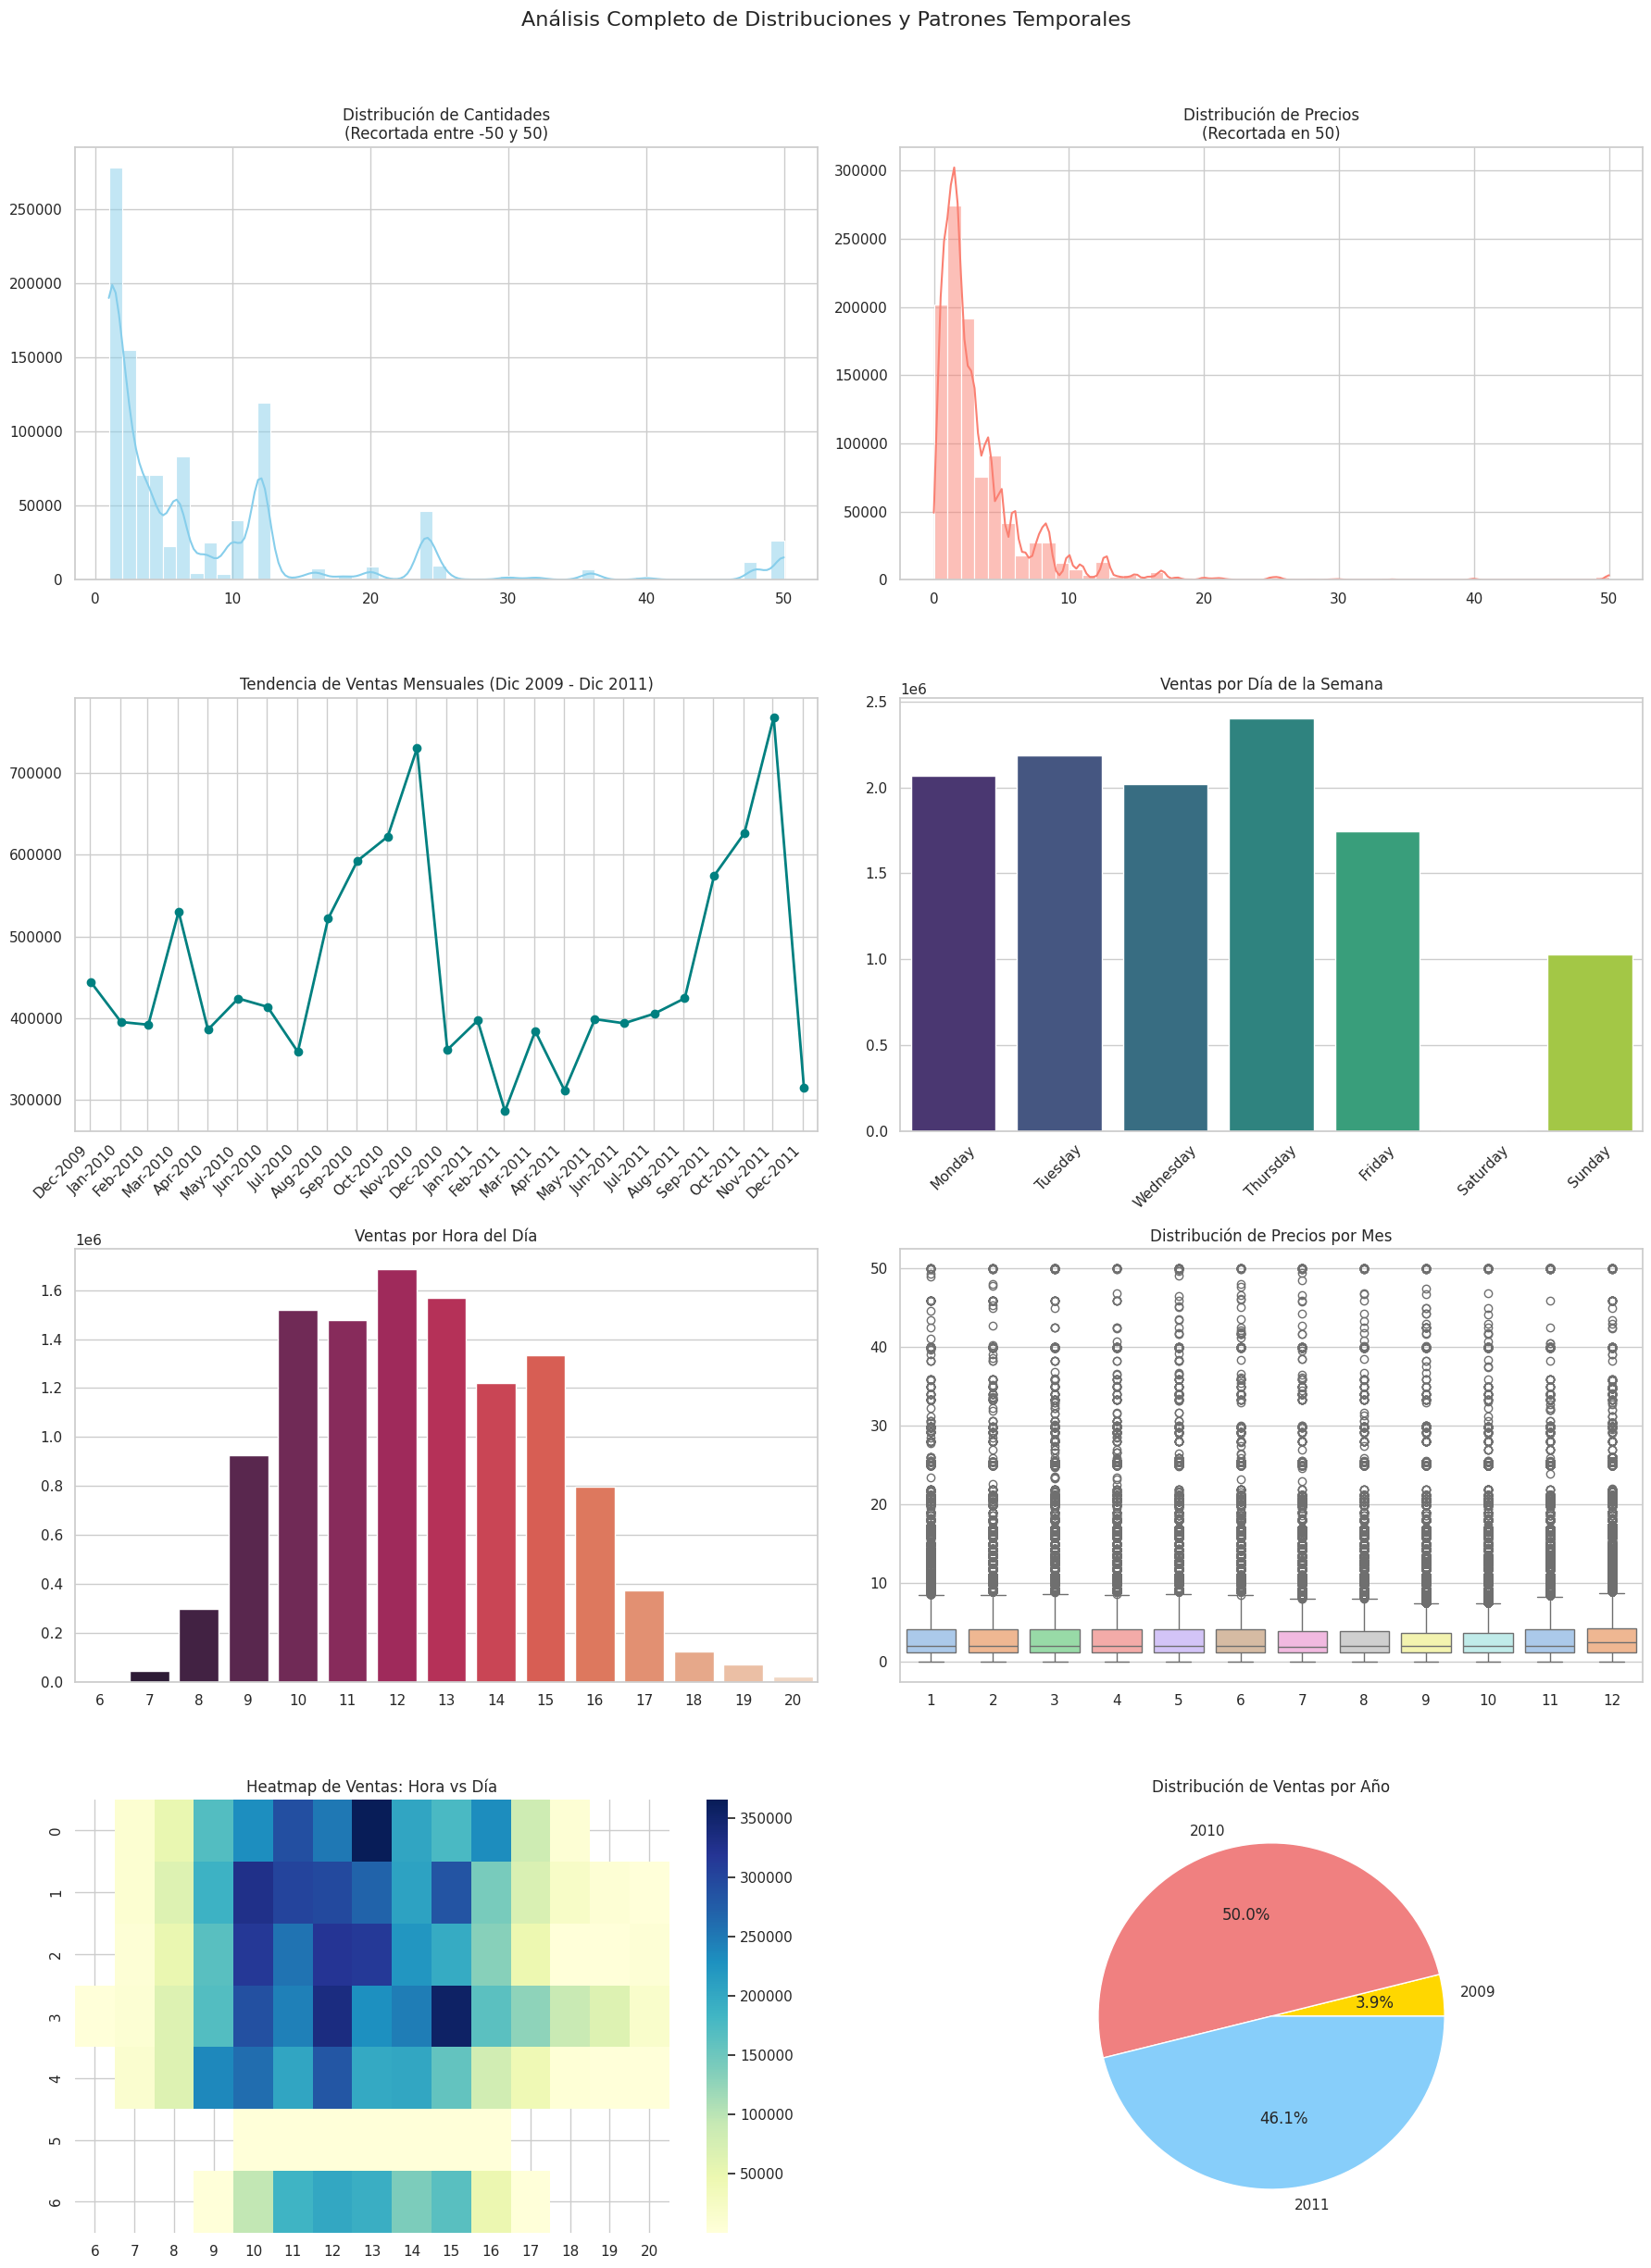

In [16]:
resultados_dist = analizar_distribuciones(df_limpio)

In [17]:
def analizar_top_5_productos(df):
    """
    Analiza los 5 productos más vendidos con gráficos
    """
    # --- 1. Identificar top 5 productos ---
    top_5 = df.groupby(['StockCode', 'Description'])['Quantity'].sum().nlargest(5).reset_index()

    # --- 2. Gráfico de barras (5 productos) ---
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(
        x='Quantity',
        y='Description',
        data=top_5,
        palette='viridis',
        edgecolor='black',
        linewidth=0.5
    )

    max_qty = top_5['Quantity'].max()
    for p in ax.patches:
        ax.text(
            p.get_width() + max_qty*0.02,
            p.get_y() + p.get_height()/2,
            f'{int(p.get_width()):,}',
            va='center',
            fontsize=10
        )

    plt.title('Top 5 Productos Más Vendidos\n', fontsize=14, pad=15)
    plt.xlabel('\nUnidades Vendidas', fontsize=12)
    plt.ylabel('')
    plt.xlim(0, max_qty*1.25)
    sns.despine()
    plt.tight_layout()
    plt.show()

    # --- 3. Tendencias mensuales (versión mejorada) ---
    # Filtrar y preparar datos
    df_top = df.merge(top_5[['StockCode', 'Description']], on=['StockCode', 'Description'], how='inner')
    df_top['YearMonth'] = df_top['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
    tendencias = df_top.groupby(['YearMonth', 'Description'])['Quantity'].sum().unstack()

    # Configurar figura
    plt.figure(figsize=(16, 8))
    ax = plt.gca()

    # Paleta de colores distintiva
    colors = sns.color_palette("husl", len(tendencias.columns)) # Use len() to ensure enough colors

    # --- Updated loop to handle potential IndexError ---
    markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', 'X', '<', '>']

    # Graficar cada producto
    for i, (desc, data) in enumerate(tendencias.items()):
        ax.plot(
            data.index,
            data.values,
            # --- Safely access markers using modulo operator ---
            marker=markers[i % len(markers)],
            linestyle='-',
            linewidth=2.5,
            markersize=9,
            markeredgewidth=1.5,
            markerfacecolor='white',
            color=colors[i % len(colors)], # Use modulo to handle extra colors
            label=desc
        )
    # --- End of updated loop ---

    # Configuración profesional de ejes
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Ajustar límites del eje Y
    y_max = tendencias.max().max()
    plt.ylim(0, y_max * 1.15)
    plt.yticks(fontsize=10)

    # Títulos y estilo
    plt.title('Tendencias Mensuales - Top 5 Productos\n',
             fontsize=16, pad=20)
    plt.xlabel('\nMes-Año', fontsize=12, labelpad=10)
    plt.ylabel('Unidades Vendidas\n', fontsize=12, labelpad=10)

    # Grid y leyenda
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(
        title='Productos',
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        frameon=True,
        framealpha=0.9,
        fontsize=10
    )

    # Añadir línea de media
    mean_val = tendencias.mean().mean()
    plt.axhline(
        y=mean_val,
        color='red',
        linestyle='--',
        linewidth=1.5,
        alpha=0.7,
        label=f'Media Global ({int(mean_val):,})'
    )

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Ajuste para leyenda
    plt.show()

    # --- 4. Heatmap de estacionalidad ---
    df_top['Month'] = df_top['InvoiceDate'].dt.month
    heatmap_data = df_top.groupby(['Description', 'Month'])['Quantity'].sum().unstack()

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        heatmap_data,
        cmap='YlGnBu',
        annot=True,
        fmt=',.0f',
        linewidths=0.5,
        annot_kws={'size': 9},
        cbar_kws={'label': 'Unidades Vendidas'}
    )
    plt.title('Patrones Mensuales - Top 5 Productos\n', fontsize=14, pad=15)
    plt.xlabel('\nMes', fontsize=12)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    return {
        'top_5_productos': top_5,
        'tendencias_mensuales': tendencias,
        'heatmap_estacionalidad': heatmap_data
    }

<ipython-input-17-fb8a320e5df4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


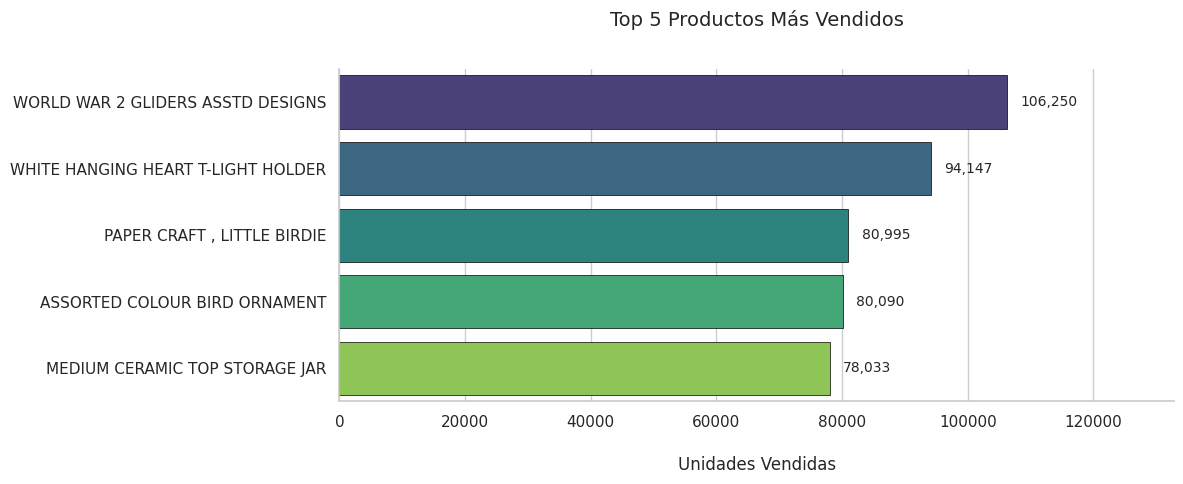

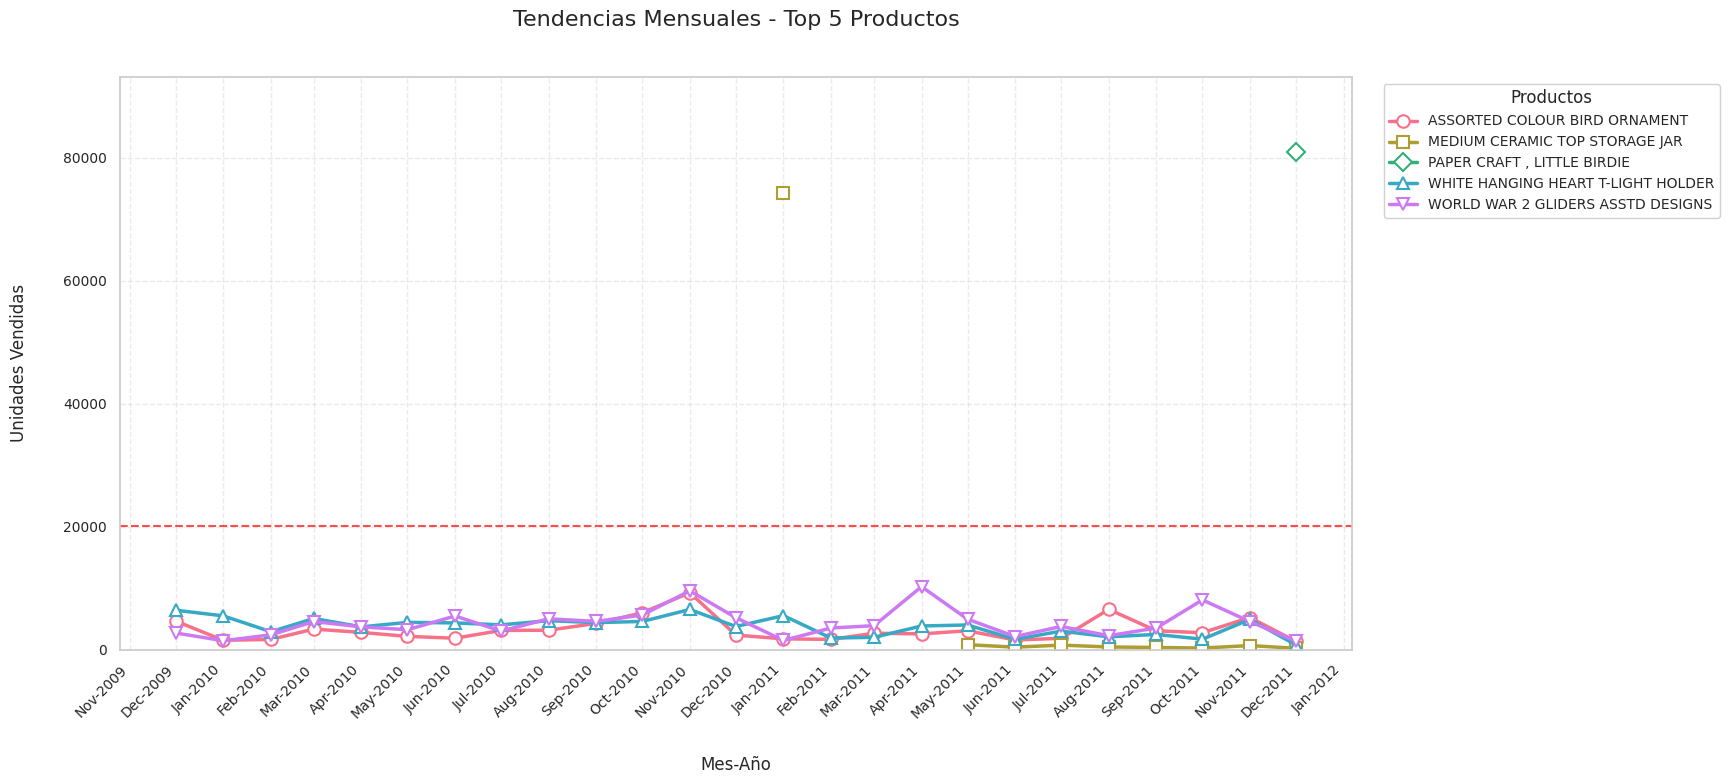

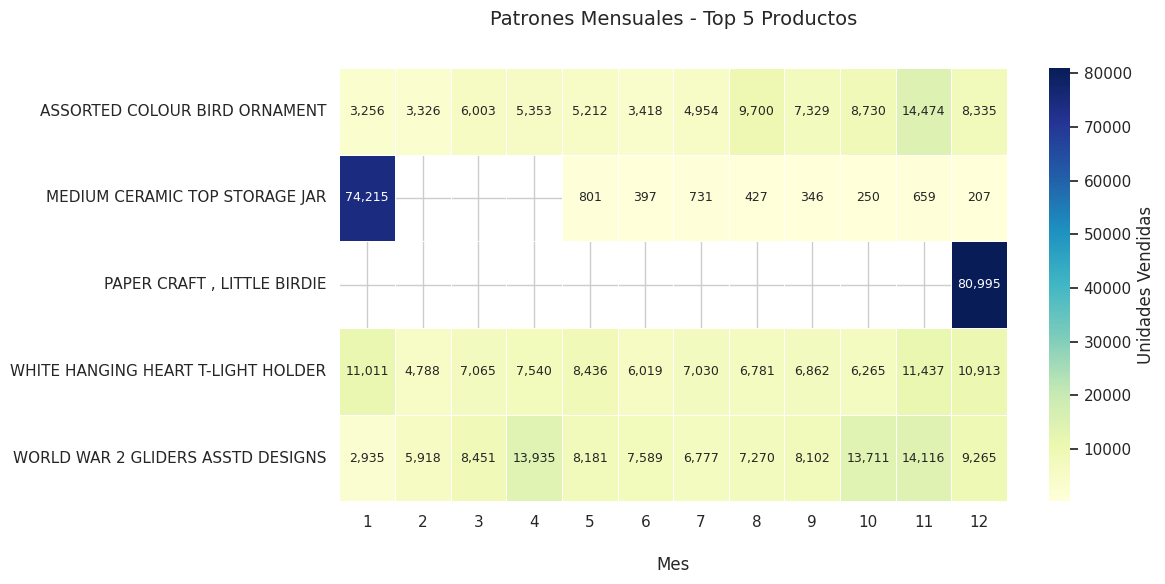

  StockCode                         Description  Quantity
0     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS    106250
1    85123A  WHITE HANGING HEART T-LIGHT HOLDER     94147
2     23843         PAPER CRAFT , LITTLE BIRDIE     80995
3     84879       ASSORTED COLOUR BIRD ORNAMENT     80090
4     23166      MEDIUM CERAMIC TOP STORAGE JAR     78033


In [18]:
resultados = analizar_top_5_productos(df_limpio)
print(resultados['top_5_productos'])

#Parte 1

In [19]:
df_limpio['TotalValue'] = df_limpio['Quantity'] * df_limpio['Price']

In [20]:
negative_transactions = (df_limpio['TotalValue'] < 0).sum()
print(f"Número de transacciones con valor negativo: {negative_transactions}")

Número de transacciones con valor negativo: 0


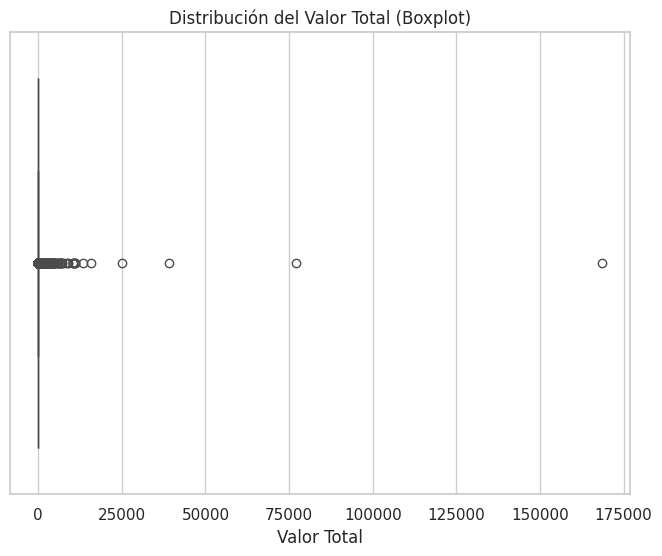

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_limpio['TotalValue'])
plt.title('Distribución del Valor Total (Boxplot)')
plt.xlabel('Valor Total')
plt.show()

In [22]:
# Calcular el valor total gastado por cliente (suma de TotalValue)
clientes = df_limpio.groupby('Customer ID')['TotalValue'].sum().reset_index()

# Definir umbral premium (percentil 80)
umbral_premium = clientes['TotalValue'].quantile(0.80)

# Clasificar clientes
clientes['Categoria'] = ['Premium' if x >= umbral_premium else 'Normal' for x in clientes['TotalValue']]

# Eliminar columna Categoria si ya existe en df_limpio
if 'Categoria' in df_limpio.columns:
    df_limpio = df_limpio.drop('Categoria', axis=1)

# Hacer el merge
df_limpio = df_limpio.merge(
    clientes[['Customer ID', 'Categoria']],
    on='Customer ID',
    how='left'
)
df_limpio['Categoria'] = df_limpio['Categoria'].astype('string')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
df_codificado = df_limpio.copy()

#Seleccionar solo la columna categórica 'Country'
X_categorical = df_codificado[['Country']]

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_categorical)

#Nombres de las nuevas columnas
nombres_columnas = encoder.get_feature_names_out(['Country'])
df_codificado[nombres_columnas] = X_encoded

Random Forest Classifier es un algoritmo de aprendizaje supervisado que combina múltiples árboles de decisión. Funciona creando diversos árboles con subconjuntos aleatorios de datos y características, luego promedia sus predicciones.

In [25]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_codificado['Categoria'])

columnas_a_excluir = [
    'StockCode', 'InvoiceDate', 'Invoice', 'Country',
    'Description', 'YearMonth', 'Weekday', 'Categoria']
X = df_codificado.drop(columns=columnas_a_excluir)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1, how='all')

#Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42
)

#Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      Normal       0.93      0.86      0.90     59127
     Premium       0.94      0.98      0.96    142980

    accuracy                           0.94    202107
   macro avg       0.94      0.92      0.93    202107
weighted avg       0.94      0.94      0.94    202107



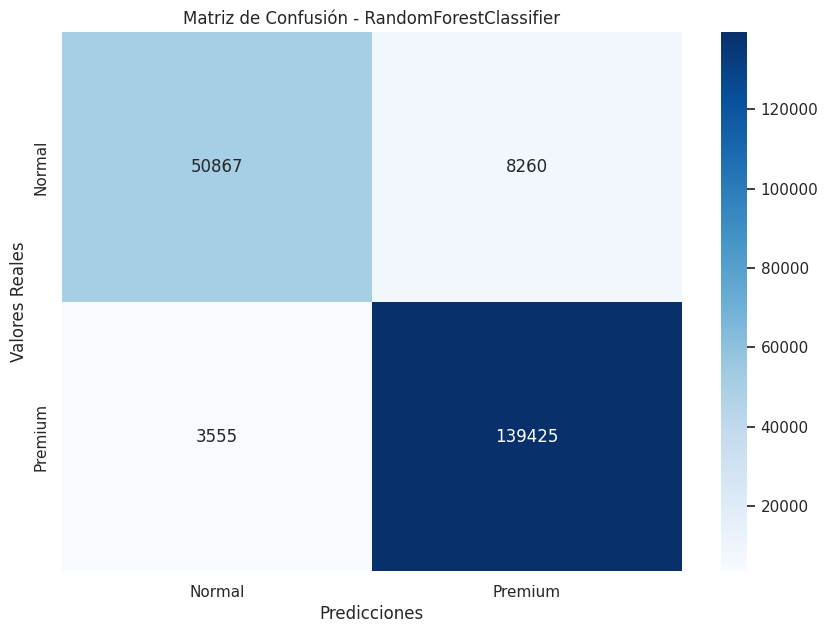

In [26]:
cm = confusion_matrix(y_test, y_pred)

# Crear figura
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - RandomForestClassifier')
plt.show()

Las métricas nos dicen que:

Precisión (93%): De todos los predichos como Normal, el 93% eran correctos.

Recall (86%): El modelo identificó correctamente el 86% de los casos Normal reales.

Precisión (94%): Alta precisión en predicciones Premium.

Recall (98%): El modelo capturó casi todos los casos Premium reales (98%).